# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 
 * Only Infubinol has outliers compared to Capomulin, Ramicane and Ceftamin treatments.

 * Correlation Coefficient: 0.9503881112220831
 

In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df=pd.merge(mouse_metadata,study_results, how='right', on = "Mouse ID" )

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [74]:
# Checking the number of mice.
num_mice=merge_df["Mouse ID"].nunique()
num_mice

249

In [75]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = merge_df[merge_df.duplicated(subset=["Mouse ID", "Timepoint"],keep=False)]
duplicate_id = duplicate["Mouse ID"].unique()
duplicate_id

array(['g989'], dtype=object)

In [76]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df=merge_df.loc[merge_df["Mouse ID"]=="g989",:]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [77]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merge_df[merge_df["Mouse ID"].isin(duplicate_df)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [78]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

249

## Summary Statistics

In [79]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor=clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median_tumor=clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
variance_tumor=clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
standard_deviation_tumor=clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem_tumor=clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

dictionary = {"Mean Tumor Volume":mean_tumor,
              "Median Tumor Volume": median_tumor,
              "Variance Tumor Volume": variance_tumor,
              "Standard Deviation Tumor Volume.": standard_deviation_tumor,
              "SEM Tumor volume": sem_tumor}

stats_drug_regimen = pd.DataFrame(dictionary)
stats_drug_regimen.head(10)

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume.,SEM Tumor volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [80]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


aggregation_summary = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean_tumor=np.mean,
    median_tumor=np.median,
    variance_tumor=np.var,
    standard_deviation_tumor=np.std,
    sem_tumor=np.std
)


## Bar and Pie Charts

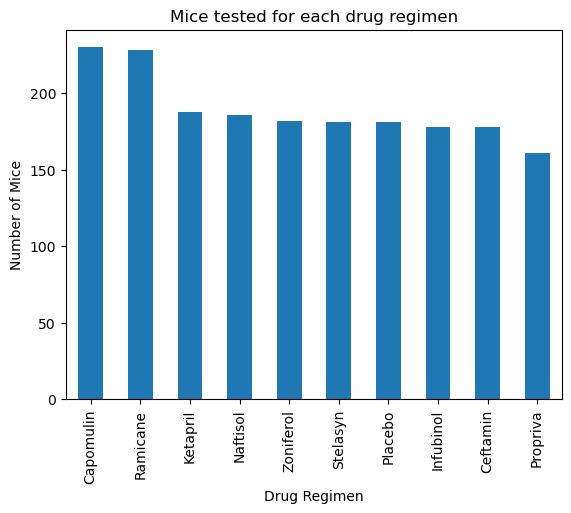

In [81]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_id_clean=clean_df["Drug Regimen"].value_counts()


mouse_id_clean.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Mice tested for each drug regimen")
plt.show()

In [82]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


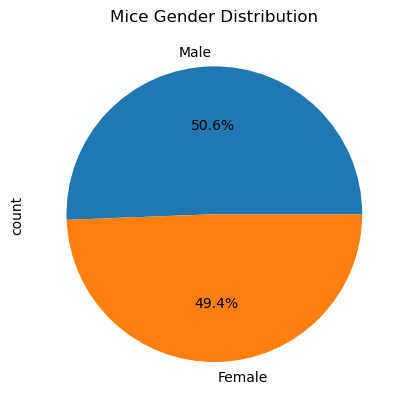

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender= clean_df["Sex"].value_counts()
plt.title("Mice Gender Distribution")
gender.plot.pie(autopct="%1.1f%%")
plt.show()

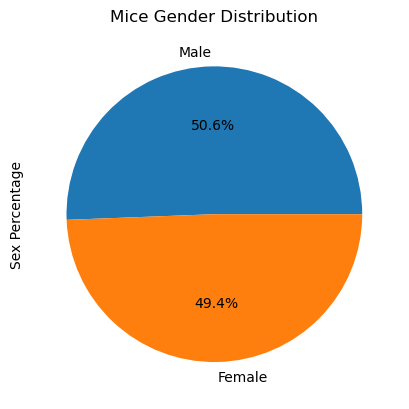

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
lables=["Female","male"]
plot=gender.plot.pie(y="Total Count",autopct="%1.1f%%")
plt.title("Mice Gender Distribution")
plt.ylabel("Sex Percentage")
plt.show()

## Quartiles, Outliers and Boxplots

In [85]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
group_clean = clean_df.groupby('Mouse ID')['Timepoint'].agg('max')


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
group_df = group_clean
tumor_volume=pd.merge(group_df,clean_df,on=["Mouse ID","Timepoint"])
tumor_volume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [86]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Capomulin_tumor_vol = []
Ramicane_tumor_vol = []
Infubinol_tumor_vol = []
Ceftamin_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

for i in range(len(tumor_volume)):
    # Locate the rows which contain mice on each drug and get the tumor volumes
    if tumor_volume.loc[i, "Drug Regimen"] == "Capomulin":
        Capomulin_tumor_vol.append(tumor_volume.loc[i, "Tumor Volume (mm3)"])
    elif tumor_volume.loc[i, "Drug Regimen"] == "Ramicane":
        Ramicane_tumor_vol.append(tumor_volume.loc[i, "Tumor Volume (mm3)"])
    elif tumor_volume.loc[i, "Drug Regimen"] == "Infubinol":
        Infubinol_tumor_vol.append(tumor_volume.loc[i, "Tumor Volume (mm3)"])
    elif tumor_volume.loc[i, "Drug Regimen"] == "Ceftamin":
        Ceftamin_tumor_vol.append(tumor_volume.loc[i, "Tumor Volume (mm3)"])

# add subset
Tumor_Volume = [Capomulin_tumor_vol, Ramicane_tumor_vol, Infubinol_tumor_vol, Ceftamin_tumor_vol]

# Determine outliers using upper and lower bounds
outlier_list = []
for i in range(len(Tumor_Volume)):
    quartiles = pd.Series(Tumor_Volume[i]).quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lowerb = lowerq - (1.5 * iqr)
    upperb = upperq + (1.5 * iqr)

    outliers = [vol for vol in Tumor_Volume[i] if vol < lowerb or vol > upperb]
    outlier_list.extend(outliers)

    print(f"Treatment: {treatments[i]}")
    print(f"Lower Quartile: {lowerq}, Upper Quartile: {upperq}, IQR: {iqr}")
    print(f"Outliers: {outliers}\n")

print(f"All outliers: {outlier_list}.")



Treatment: Capomulin
Lower Quartile: 32.37735684, Upper Quartile: 40.1592203, IQR: 7.781863460000004
Outliers: []

Treatment: Ramicane
Lower Quartile: 31.56046955, Upper Quartile: 40.65900627, IQR: 9.098536719999998
Outliers: []

Treatment: Infubinol
Lower Quartile: 54.04860769, Upper Quartile: 65.52574285, IQR: 11.477135160000003
Outliers: [36.3213458]

Treatment: Ceftamin
Lower Quartile: 48.72207785, Upper Quartile: 64.29983003, IQR: 15.577752179999997
Outliers: []

All outliers: [36.3213458].


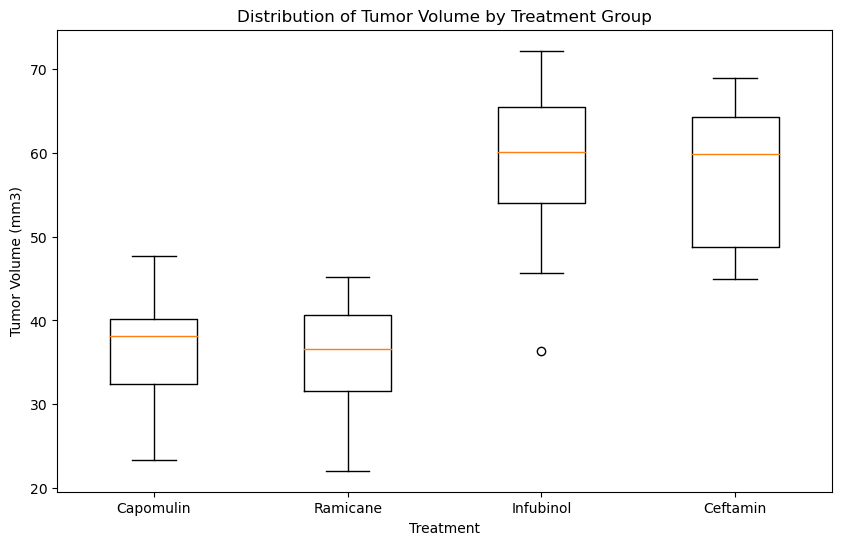

In [87]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

    # Create a list containing the tumor volume data for each treatment group
tumor_vol_data = [Capomulin_tumor_vol, Ramicane_tumor_vol, Infubinol_tumor_vol, Ceftamin_tumor_vol]
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments)
plt.title("Distribution of Tumor Volume by Treatment Group")
plt.xlabel("Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

<Figure size 1000x600 with 0 Axes>

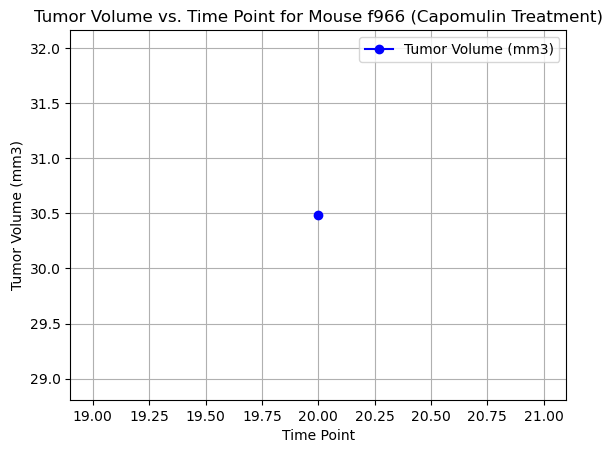

In [88]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


# Choose the Mouse ID and Drug Regimen you want to plot 
mouse_id = 'f966'
drug_regimen = 'Capomulin'

# Filter the data for the specific mouse ID and Capomulin treatment
filtered_data = tumor_volume[(tumor_volume['Mouse ID'] == mouse_id) & (tumor_volume['Drug Regimen'] == drug_regimen)]

# Generate the line plot
plt.figure(figsize=(10, 6))
filtered_data.plot(x='Timepoint', y='Tumor Volume (mm3)', marker='o', linestyle='-', color='b')
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.show()

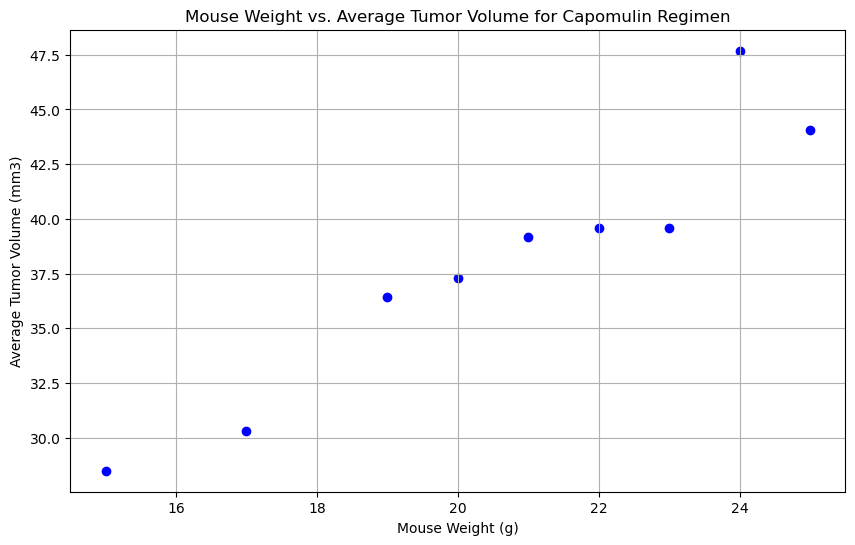

In [89]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data for the Capomulin regimen
capomulin_data = tumor_volume[tumor_volume['Drug Regimen'] == 'Capomulin']

# Group the data by mouse weight and calculate the average tumor volume for each weight group
average_tumor_volume = capomulin_data.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()

# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], marker='o', color='b')
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

## Correlation and Regression

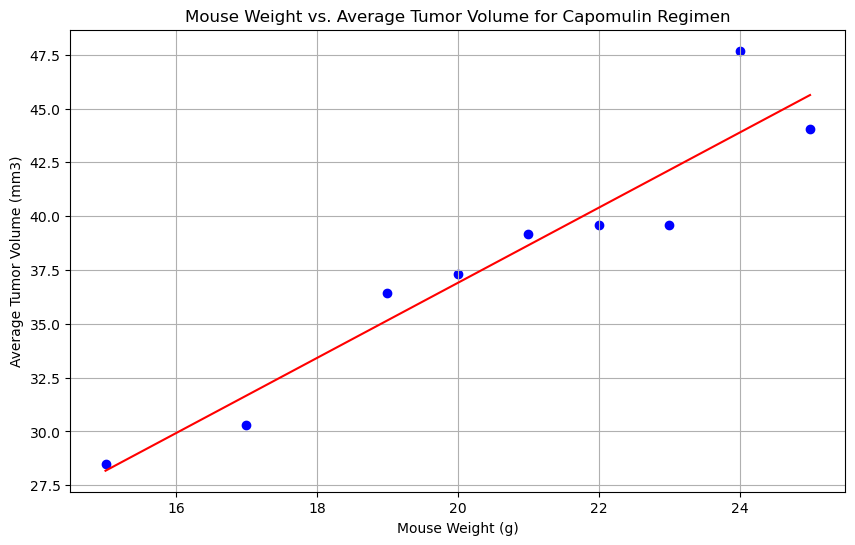

Correlation Coefficient: 0.9503881112220831
Linear Regression Model: y = 1.75x + 2.00


In [90]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


# Filter the data for the Capomulin regimen
capomulin_data = tumor_volume[tumor_volume['Drug Regimen'] == 'Capomulin']

# Group the data by mouse weight and calculate the average tumor volume for each weight group
average_tumor_volume = capomulin_data.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()

# Calculate the correlation coefficient
correlation_coefficient, _ = stats.pearsonr(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])

# Perform linear regression
slope, intercept, _, _, _ = stats.linregress(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])

# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], marker='o', color='b')
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Add the linear regression line to the plot
plt.plot(average_tumor_volume['Weight (g)'], slope * average_tumor_volume['Weight (g)'] + intercept, color='r')

plt.grid(True)
plt.show()

print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"Linear Regression Model: y = {slope:.2f}x + {intercept:.2f}")